# Importing Libraries

In [37]:
# Dataframe building and manipulation
import pandas as pd
import numpy as np

# Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Importing DataFrames

In [38]:
# Dataframes we will use
train_labels = pd.read_csv('Data/training_set_labels.csv')
train_vals = pd.read_csv('Data/training_set_values.csv')

#For competition submission
test_vals = pd.read_csv('Data/test_set_values.csv')
sub_form = pd.read_csv('Data/SubmissionFormat.csv')

Displaying all columns because I want to

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
# Checking number of entries
print('train_vals:', train_vals.shape)
print('train_labels', train_labels.shape)
print('test_vals', test_vals.shape)

train_vals: (59400, 40)
train_labels (59400, 2)
test_vals (14850, 40)


### Merging our Train Values and Test Values into one dataframe

In [ ]:
df_submission = test_vals

In [41]:
df = pd.merge(train_vals, train_labels,left_on='id', right_on='id',how='outer')

In [42]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


I'm creating a dataframe with columns I will consider

In [43]:
final_df = df[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'public_meeting', 'basin', 'region',
        'scheme_management', 'permit', 'extraction_type', 'management_group',
        'payment', 'water_quality', 'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
        'status_group']]

In [44]:
final_df.head()

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,basin,region,scheme_management,permit,extraction_type,management_group,payment,water_quality,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,109,True,Lake Nyasa,Iringa,VWC,False,gravity,user-group,pay annually,soft,good,enough,spring,communal standpipe,functional
1,0.0,1399,34.698766,-2.147466,280,NaN,Lake Victoria,Mara,Other,True,gravity,user-group,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,250,True,Pangani,Manyara,VWC,True,gravity,user-group,pay per bucket,soft,good,enough,dam,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,58,True,Ruvuma / Southern Coast,Mtwara,VWC,True,submersible,user-group,never pay,soft,good,dry,borehole,communal standpipe,non functional
4,0.0,0,31.130847,-1.825359,0,True,Lake Victoria,Kagera,NaN,True,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,functional


# Cleaning

Formula to combine SWC, Trust, and None classifications into Other in scheme_management
since there are only a few entries for these classifications

In [45]:
def to_other(entry):
    if entry in ['SWC', 'Trust', 'None']:
        return 'Other'
    if entry is None:
        return 'Other'
    else:
        return entry

In [46]:
final_df.scheme_management.fillna(value='Other', inplace=True)

C:\Users\Cristian\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [47]:
final_df.scheme_management = final_df.scheme_management.apply(to_other)

C:\Users\Cristian\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Filling in nulls. I am considering worst case scenario for these nulls. This implies
that the wells are not in a public meeting space or have a permit

In [48]:
final_df.public_meeting.fillna(value=0, inplace=True)

In [49]:
final_df.permit.fillna(value=0, inplace=True)

In [50]:
final_df.head()

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,basin,region,scheme_management,permit,extraction_type,management_group,payment,water_quality,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,34.938093,-9.856322,109,True,Lake Nyasa,Iringa,VWC,False,gravity,user-group,pay annually,soft,good,enough,spring,communal standpipe,functional
1,0.0,1399,34.698766,-2.147466,280,0,Lake Victoria,Mara,Other,True,gravity,user-group,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,37.460664,-3.821329,250,True,Pangani,Manyara,VWC,True,gravity,user-group,pay per bucket,soft,good,enough,dam,communal standpipe,functional
3,0.0,263,38.486161,-11.155298,58,True,Ruvuma / Southern Coast,Mtwara,VWC,True,submersible,user-group,never pay,soft,good,dry,borehole,communal standpipe,non functional
4,0.0,0,31.130847,-1.825359,0,True,Lake Victoria,Kagera,Other,True,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,functional


Turning True and False to binary integer inputs

In [51]:
final_df[['public_meeting', 'permit']] = final_df[['public_meeting', 'permit', ]].astype(int)

C:\Users\Cristian\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Making Dummies for the dataframe and splitting between our target variable and
everything else

In [52]:
X = pd.get_dummies(final_df.iloc[:,:-1])
y = final_df.status_group

Train test split our data twice to not rely on initial test data from the first split
and tailor our model to that without thinking

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [55]:
X2_train.head()

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_management_Company,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_never pay,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_borehole,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
24245,500.0,547,34.644680,-1.101132e+01,50,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
12561,0.0,0,0.000000,-2.000000e-08,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
32998,4000.0,175,38.831292,-5.183198e+00,250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
44143,0.0,357,38.726849,-1.087458e+01,120,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
20232,20.0,1021,36.804901,-3.468340e+00,100,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [19]:
final_df.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [20]:
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [21]:
y2_train.value_counts(normalize=True)

functional                 0.541930
non functional             0.386416
functional needs repair    0.071654
Name: status_group, dtype: float64

# Model Building

Scaling numerical data

In [65]:
numeric = X2_train.iloc[:, 0:5]
cat = X2_train.iloc[:, 5:]

ss = StandardScaler()
X2_train_sc = ss.fit_transform(numeric)
numeric2_sc = pd.DataFrame(X2_train_sc, index=numeric.index, columns=numeric.columns)

scaled_df_train2 = pd.concat([numeric2_sc, cat], axis=1)

### K-Nearest Neighbors

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_df_train2,y2_train)
knn_preds = knn.predict(X2_test)

knn_cm_test = confusion_matrix(y2_test, knn_preds)
print(knn_cm_test)
print(classification_report(y2_test, knn_preds))

[[4459   83  663]
 [ 593   16  121]
 [2783   63  723]]
                         precision    recall  f1-score   support

             functional       0.57      0.86      0.68      5205
functional needs repair       0.10      0.02      0.04       730
         non functional       0.48      0.20      0.28      3569

               accuracy                           0.55      9504
              macro avg       0.38      0.36      0.33      9504
           weighted avg       0.50      0.55      0.48      9504



In [107]:
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train, y_train)
knn_final_preds = knn_final.predict(X_test)
print(classification_report(y_test, knn_final_preds))

                         precision    recall  f1-score   support

             functional       0.69      0.80      0.74      6452
functional needs repair       0.39      0.19      0.25       863
         non functional       0.68      0.60      0.64      4565

               accuracy                           0.68     11880
              macro avg       0.59      0.53      0.54     11880
           weighted avg       0.67      0.68      0.67     11880



### Naive Bayes

In [68]:
nb = GaussianNB()
nb.fit(scaled_df_train2, y2_train)
nb_preds = nb.predict(X2_test)

#nb_cm_test = confusion_matrix(y2_test, nb_preds)
#print(nb_cm_test)
print(classification_report(y2_test, nb_preds))

                         precision    recall  f1-score   support

             functional       0.57      0.69      0.62      5205
functional needs repair       0.09      0.40      0.15       730
         non functional       0.77      0.01      0.03      3569

               accuracy                           0.41      9504
              macro avg       0.48      0.37      0.27      9504
           weighted avg       0.61      0.41      0.36      9504



In [108]:
nb_final = GaussianNB()
nb_final.fit(X_train, y_train)
nb_final_preds = nb.predict(X_test)
print(classification_report(y_test, nb_final_preds))

                         precision    recall  f1-score   support

             functional       0.56      0.68      0.61      6452
functional needs repair       0.09      0.41      0.15       863
         non functional       0.86      0.02      0.03      4565

               accuracy                           0.40     11880
              macro avg       0.50      0.37      0.26     11880
           weighted avg       0.64      0.40      0.36     11880



### Random Forest

In [326]:
rf = RandomForestClassifier()
rf.fit(X2_train,y2_train)

preds_rf_X2test = rf.predict(X2_test)

print(classification_report(y2_test, preds_rf_X2test))

                         precision    recall  f1-score   support

             functional       0.80      0.87      0.83      5205
functional needs repair       0.52      0.32      0.40       730
         non functional       0.81      0.77      0.79      3569

               accuracy                           0.79      9504
              macro avg       0.71      0.65      0.67      9504
           weighted avg       0.78      0.79      0.79      9504



In [70]:
rf_sc = RandomForestClassifier()

rf_sc.fit(scaled_df_train2, y2_train)
rf_sc_preds = rf_sc.predict(X2_test)
print(classification_report(y2_test, rf_sc_preds))
print(confusion_matrix(y2_test, rf_sc_preds))

                         precision    recall  f1-score   support

             functional       0.66      0.96      0.79      5205
functional needs repair       1.00      0.00      0.01       730
         non functional       0.86      0.48      0.62      3569

               accuracy                           0.71      9504
              macro avg       0.84      0.48      0.47      9504
           weighted avg       0.77      0.71      0.66      9504

[[4999    0  206]
 [ 667    2   61]
 [1859    0 1710]]


In [72]:
rf_test = RandomForestClassifier()
rf_test.fit(X_train, y_train)

preds_rf_test = rf_test.predict(X_test)

print(classification_report(y_test, preds_rf_test))

                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84      6452
functional needs repair       0.48      0.32      0.39       863
         non functional       0.83      0.79      0.81      4565

               accuracy                           0.80     11880
              macro avg       0.70      0.66      0.68     11880
           weighted avg       0.79      0.80      0.79     11880



In [308]:
rf_cm_test = confusion_matrix(y_test, preds_rf_test, normalize='true')

In [309]:
rf_cm_test

array([[0.8699628 , 0.0350279 , 0.0950093 ],
       [0.50984936, 0.32444959, 0.16570104],
       [0.19649507, 0.01708653, 0.7864184 ]])

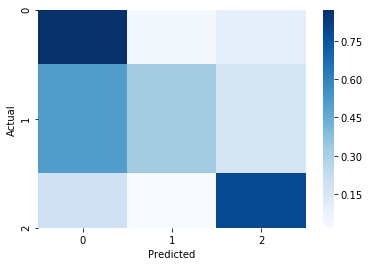

In [310]:
sns.heatmap(rf_cm_test, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('iamconfusion.png')
plt.show()

In [335]:
print(f1_score(y_test, preds_rf_test, average='weighted'))

0.7925566270285916


### Bagging

In [73]:
bag = BaggingClassifier()
bag.fit(X2_train, y2_train)

preds_bag_test = bag.predict(X2_test)

bag_cm_test = confusion_matrix(y2_test, preds_bag_test)
print(bag_cm_test)
print(classification_report(y2_test, preds_bag_test))

[[4579  158  468]
 [ 390  238  102]
 [ 817   69 2683]]
                         precision    recall  f1-score   support

             functional       0.79      0.88      0.83      5205
functional needs repair       0.51      0.33      0.40       730
         non functional       0.82      0.75      0.79      3569

               accuracy                           0.79      9504
              macro avg       0.71      0.65      0.67      9504
           weighted avg       0.78      0.79      0.78      9504



In [109]:
bag_final = BaggingClassifier()
bag_final.fit(X_train, y_train)

bag_final_preds = bag_final.predict(X_test)

print(classification_report(y_test, bag_final_preds))

                         precision    recall  f1-score   support

             functional       0.79      0.87      0.83      6452
functional needs repair       0.47      0.32      0.38       863
         non functional       0.83      0.76      0.80      4565

               accuracy                           0.79     11880
              macro avg       0.70      0.65      0.67     11880
           weighted avg       0.78      0.79      0.79     11880



### Extra Trees

In [75]:
et = ExtraTreesClassifier()
et.fit(X2_train,y2_train)

preds_et_test = et.predict(X2_test)

et_cm_test = confusion_matrix(y2_test, preds_et_test)
print(et_cm_test)
print(classification_report(y2_test, preds_et_test))

[[4433  186  586]
 [ 379  229  122]
 [ 738   89 2742]]
                         precision    recall  f1-score   support

             functional       0.80      0.85      0.82      5205
functional needs repair       0.45      0.31      0.37       730
         non functional       0.79      0.77      0.78      3569

               accuracy                           0.78      9504
              macro avg       0.68      0.64      0.66      9504
           weighted avg       0.77      0.78      0.77      9504



In [110]:
et_final = ExtraTreesClassifier()
et_final.fit(X_train, y_train)

et_final_preds = et_final.predict(X_test)

print(classification_report(y_test, et_final_preds))

                         precision    recall  f1-score   support

             functional       0.81      0.85      0.83      6452
functional needs repair       0.44      0.34      0.38       863
         non functional       0.81      0.78      0.79      4565

               accuracy                           0.79     11880
              macro avg       0.69      0.66      0.67     11880
           weighted avg       0.78      0.79      0.78     11880



### Grid Search

In [84]:
rf_gs = RandomForestClassifier()

In [85]:
param_grid = {'criterion':['gini', 'entropy'],
              'min_impurity_split':[1e-7,.15],
              'max_depth': [3,10],
              'class_weight': [None, 'balanced'],
              'max_features': ['sqrt', None]}

In [86]:
import warnings
warnings.filterwarnings("ignore")

gs = GridSearchCV(estimator=rf_gs, param_grid=param_grid, cv=5)
gs.fit(X2_train, y2_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [111]:
gs_be = gs.best_estimator_
gs_be.fit(X2_train, y2_train)
preds_gs = gs_be.predict(X2_test)

In [88]:
gs_be

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
gs_cm = confusion_matrix(y2_test, preds_gs)
print(gs_cm)
print(classification_report(y2_test, preds_gs))

[[4937   21  247]
 [ 618   54   58]
 [1430    3 2136]]
                         precision    recall  f1-score   support

             functional       0.71      0.95      0.81      5205
functional needs repair       0.69      0.07      0.13       730
         non functional       0.88      0.60      0.71      3569

               accuracy                           0.75      9504
              macro avg       0.76      0.54      0.55      9504
           weighted avg       0.77      0.75      0.72      9504



### SMOTE

I balance the classes with SMOTE and then use a Random Forest Classifier

#### SMOTE + RF

In [78]:
sm = SMOTE(random_state=42)
X2_train_os, y2_train_os = sm.fit_sample(X2_train, y2_train)

rf_os = RandomForestClassifier()
rf_os.fit(X2_train_os, y2_train_os)

preds_os = rf_os.predict(X2_test)

print(classification_report(y2_test, preds_os))

                         precision    recall  f1-score   support

             functional       0.82      0.83      0.82      5205
functional needs repair       0.41      0.42      0.42       730
         non functional       0.81      0.78      0.79      3569

               accuracy                           0.78      9504
              macro avg       0.68      0.68      0.68      9504
           weighted avg       0.78      0.78      0.78      9504



In [363]:
y2_train_os.value_counts()

functional                 20602
non functional             20602
functional needs repair    20602
Name: status_group, dtype: int64

In [120]:
sm_final = SMOTE(random_state=42)
X_train_os, y_train_os = sm_final.fit_sample(X_train, y_train)

rf_final_os = RandomForestClassifier()
rf_final_os.fit(X_train, y_train)

rf_final_os_preds = rf_final_os.predict(X_test)

print(classification_report(y_test, rf_final_os_preds))

                         precision    recall  f1-score   support

             functional       0.80      0.87      0.84      6452
functional needs repair       0.48      0.32      0.38       863
         non functional       0.83      0.78      0.80      4565

               accuracy                           0.80     11880
              macro avg       0.70      0.66      0.67     11880
           weighted avg       0.79      0.80      0.79     11880



In [313]:
cm_os = confusion_matrix(y_test, rf_final_os_preds)

In [314]:
cm_os

array([[5616,  224,  612],
       [ 450,  277,  136],
       [ 925,   79, 3561]], dtype=int64)

In [319]:
from sklearn.metrics import plot_confusion_matrix

In [321]:
list(y.unique())

['functional', 'non functional', 'functional needs repair']

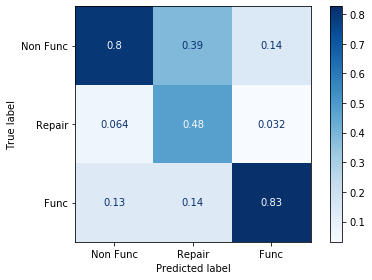

In [329]:
plot_confusion_matrix(rf_final_os, X_test, y_test, display_labels=['Non Func', 'Repair', 'Func'],  cmap=plt.cm.Blues, normalize='pred')
plt.tight_layout()
plt.savefig('iamconfusion.png')

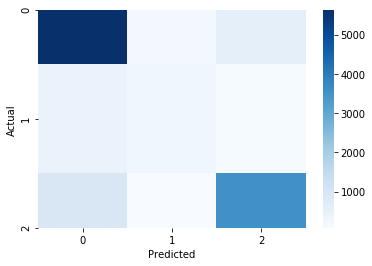

In [315]:
sns.heatmap(cm_os, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('iamconfusion.png')
plt.show()

In [375]:
cm_rf_os = confusion_matrix(y_test, preds_os_test)
cm_rf_os

array([[5358,  416,  678],
       [ 356,  371,  136],
       [ 821,  127, 3617]], dtype=int64)

In [377]:
print(rf_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### SMOTE + Bagging

In [79]:
bag_os = BaggingClassifier()
bag_os.fit(X2_train_os, y2_train_os)

preds_bag_os_test = bag.predict(X2_test)

bag_os_cm_test = confusion_matrix(y2_test, preds_bag_os_test)
print(bag_os_cm_test)
print(classification_report(y2_test, preds_bag_os_test))

et_os = ExtraTreesClassifier()
et_os.fit(X2_train_os,y2_train_os)

preds_et_os_test = et.predict(X2_test)

et_os_cm_test = confusion_matrix(y2_test, preds_et_os_test)
print(et_os_cm_test)
print(classification_report(y2_test, preds_et_os_test))

[[4579  158  468]
 [ 390  238  102]
 [ 817   69 2683]]
                         precision    recall  f1-score   support

             functional       0.79      0.88      0.83      5205
functional needs repair       0.51      0.33      0.40       730
         non functional       0.82      0.75      0.79      3569

               accuracy                           0.79      9504
              macro avg       0.71      0.65      0.67      9504
           weighted avg       0.78      0.79      0.78      9504

[[4433  186  586]
 [ 379  229  122]
 [ 738   89 2742]]
                         precision    recall  f1-score   support

             functional       0.80      0.85      0.82      5205
functional needs repair       0.45      0.31      0.37       730
         non functional       0.79      0.77      0.78      3569

               accuracy                           0.78      9504
              macro avg       0.68      0.64      0.66      9504
           weighted avg       0.77      

In [121]:
bag_final_os = BaggingClassifier()
bag_final_os.fit(X_train_os, y_train_os)

bag_final_os_preds = bag_final_os.predict(X_test)

print(classification_report(y_test, bag_final_os_preds))

                         precision    recall  f1-score   support

             functional       0.81      0.83      0.82      6452
functional needs repair       0.37      0.43      0.39       863
         non functional       0.82      0.76      0.79      4565

               accuracy                           0.77     11880
              macro avg       0.66      0.67      0.67     11880
           weighted avg       0.78      0.77      0.78     11880



## XGB

In [80]:
xgb = XGBClassifier()
xgb.fit(X2_train, y2_train)

xgb_preds = xgb.predict(X2_test)

print(classification_report(y2_test, xgb_preds))

                         precision    recall  f1-score   support

             functional       0.76      0.91      0.83      5205
functional needs repair       0.67      0.21      0.32       730
         non functional       0.84      0.72      0.77      3569

               accuracy                           0.79      9504
              macro avg       0.76      0.61      0.64      9504
           weighted avg       0.79      0.79      0.77      9504



#### SMOTE + XGB

In [122]:
xgb_os = XGBClassifier()
xgb_os.fit(X_train_os, y_train_os)
xgb_os_preds = xgb.predict(X_test)

print(classification_report(y_test, xgb_os_preds))

                         precision    recall  f1-score   support

             functional       0.77      0.91      0.83      6452
functional needs repair       0.62      0.20      0.30       863
         non functional       0.84      0.73      0.78      4565

               accuracy                           0.79     11880
              macro avg       0.74      0.61      0.64     11880
           weighted avg       0.78      0.79      0.77     11880



# Plotting feature importances

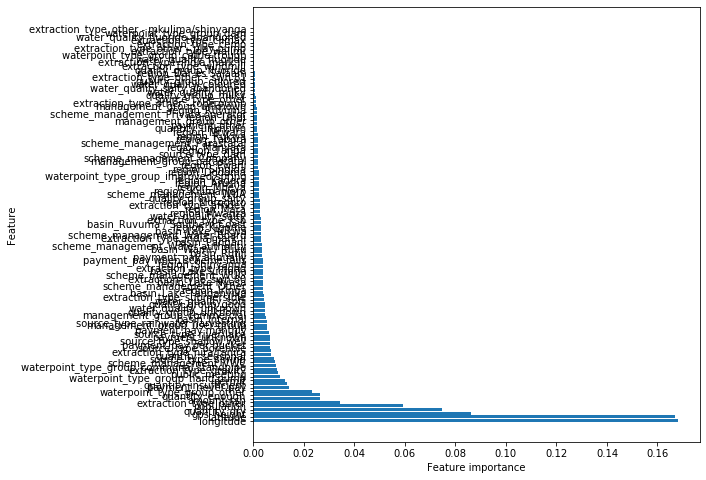

In [123]:
def plot_feature_importances(model):
    n_features = X2_train.shape[1]
    features = dict(zip(X2_train.columns.values, model.feature_importances_))
    f_sorted = dict(sorted(features.items(), key=lambda d: d[1], reverse=True))
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), f_sorted.values(), align='center') 
    plt.yticks(np.arange(n_features), f_sorted.keys()) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    return f_sorted
    
feature_importances = plot_feature_importances(rf_final_os)

In [124]:
top10 = dict(zip(list(feature_importances.keys())[:10],list(feature_importances.values())))

In [125]:
top10

{'longitude': 0.16830345239162411,
 'latitude': 0.1667334380866873,
 'gps_height': 0.08635429151355241,
 'quantity_dry': 0.07469660030275672,
 'population': 0.05919028767333323,
 'extraction_type_other': 0.03431033146489805,
 'amount_tsh': 0.026317018310219462,
 'quantity_enough': 0.026211688040709235,
 'waterpoint_type_group_other': 0.023273878532638504,
 'payment_never pay': 0.014178021738983328}

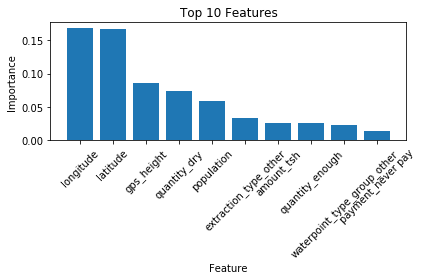

In [318]:
plt.bar(top10.keys(), top10.values())
plt.xticks(rotation=45)
plt.title('Top 10 Features')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig('importances.png')

# EDA

In [128]:
df.longitude.min()

0.0

In [129]:
df.longitude.max()

40.34519307

In [130]:
df.latitude.min()

-11.64944018

In [131]:
df.latitude.max()

-2e-08

In [127]:
df.installer.value_counts()

DWE                           17402
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
                              ...  
Megis                             1
DWE/Ubalozi wa Marekani           1
MUSLIMEHEFEN INTERNATIONAL        1
Hamis Makombo                     1
Jerem                             1
Name: installer, Length: 2145, dtype: int64

In [142]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [164]:
functional = final_df[final_df.status_group == 'functional']
non_functional = final_df[final_df.status_group == 'non functional']
needs_repair = final_df[final_df.status_group == 'functional needs repair']

In [151]:
needs_repair

,amount_tsh,gps_height,population,public_meeting,basin,region,scheme_management,permit,extraction_type,management_group,payment,water_quality,quality_group,quantity,source_type,waterpoint_type_group,status_group
18,0.0,1162,1000,0,Lake Victoria,Mwanza,Other,1,other,user-group,never pay,milky,milky,insufficient,spring,other,functional needs repair
22,0.0,1510,350,1,Rufiji,Iringa,WUA,1,gravity,user-group,never pay,soft,good,enough,river/lake,communal standpipe,functional needs repair
25,0.0,1273,140,1,Pangani,Kilimanjaro,VWC,1,gravity,user-group,unknown,soft,good,enough,spring,communal standpipe,functional needs repair
32,0.0,1481,180,0,Pangani,Kilimanjaro,Other,1,gravity,other,never pay,soft,good,insufficient,river/lake,other,functional needs repair
44,20.0,1007,100,1,Pangani,Arusha,VWC,1,gravity,user-group,pay per bucket,soft,good,insufficient,spring,communal standpipe,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59322,6000.0,532,1,1,Ruvuma / Southern Coast,Ruvuma,VWC,0,swn 80,user-group,pay annually,soft,good,enough,borehole,hand pump,functional needs repair
59328,2000.0,1497,195,1,Internal,Singida,VWC,1,nira/tanira,user-group,pay when scheme fails,soft,good,enough,shallow well,hand pump,functional needs repair
59333,50.0,706,1,1,Ruvuma / Southern Coast,Ruvuma,VWC,0,submersible,user-group,pay per bucket,soft,good,enough,borehole,communal standpipe,functional needs repair
59345,600.0,962,500,1,Lake Tanganyika,Kigoma,WUG,1,gravity,user-group,pay monthly,soft,good,enough,river/lake,communal standpipe,functional needs repair


In [160]:
#BBox = ((map_df.longitude.min(), map_df.longitude.max(),      
#         map_df.latitude.min(), map_df.latitude.max()))
BBox = ((29.607, 40.345, -11.649, -0.998))

In [143]:
print(map_df.longitude.min(),
      map_df.longitude.max(),
      map_df.latitude.min(),
      map_df.latitude.max())

29.6071219 40.34519307 -11.64944018 -0.99846435


In [141]:
map_df = df[df.longitude>25]

In [161]:
my_map = plt.imread('map.png')

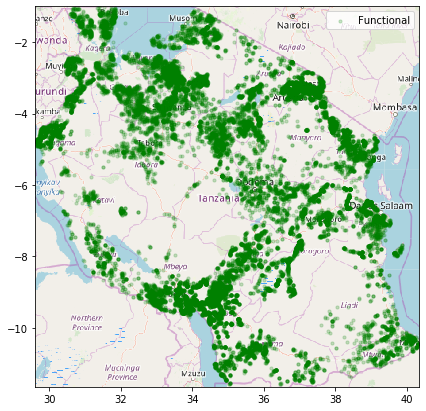

In [258]:
fig, ax = plt.subplots(figsize=(8,7))

#ax.scatter(map_df.longitude, map_df.latitude, zorder=1, alpha= 0.2, s=10)

#ax.scatter(non_functional.longitude, non_functional.latitude, zorder=1, s=10, color='r')
ax.scatter(functional.longitude, functional.latitude, alpha=.2, zorder=1, s=10, color='g')
#ax.scatter(needs_repair.longitude, needs_repair.latitude, alpha=.5, zorder=1, s=10)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(my_map, zorder=0, extent = BBox, aspect= 'equal')

plt.legend(['Functional', 'Non-Functional', 'Needs Repair'])

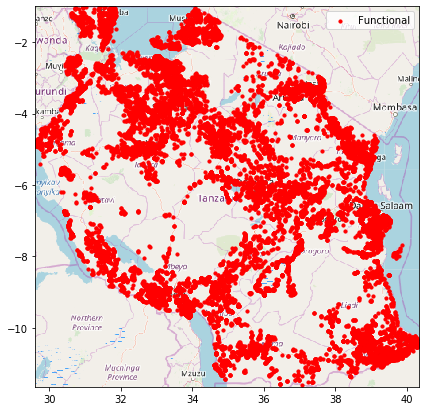

In [259]:
fig, ax = plt.subplots(figsize=(8,7))

#ax.scatter(map_df.longitude, map_df.latitude, zorder=1, alpha= 0.2, s=10)

ax.scatter(non_functional.longitude, non_functional.latitude, zorder=1, s=10, color='r')
#ax.scatter(functional.longitude, functional.latitude, alpha=.2, zorder=1, s=10, color='g')
#ax.scatter(needs_repair.longitude, needs_repair.latitude, alpha=.5, zorder=1, s=10)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(my_map, zorder=0, extent = BBox, aspect= 'equal')

plt.legend(['Functional', 'Non-Functional', 'Needs Repair'])

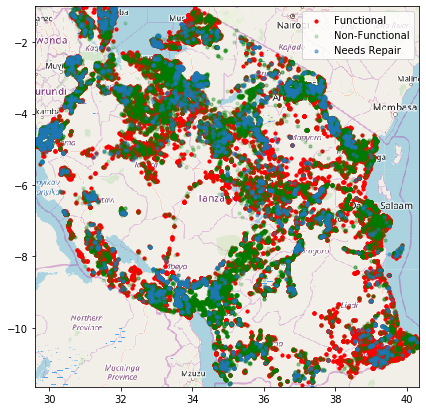

In [257]:
fig, ax = plt.subplots(figsize=(8,7))

#ax.scatter(map_df.longitude, map_df.latitude, zorder=1, alpha= 0.2, s=10)

ax.scatter(non_functional.longitude, non_functional.latitude, zorder=1, s=10, color='r')
ax.scatter(functional.longitude, functional.latitude, alpha=.2, zorder=1, s=10, color='g')
ax.scatter(needs_repair.longitude, needs_repair.latitude, alpha=.5, zorder=1, s=10)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(my_map, zorder=0, extent = BBox, aspect= 'equal')

plt.legend(['Functional', 'Non-Functional', 'Needs Repair'])

plt.savefig('map_of_wells.png')

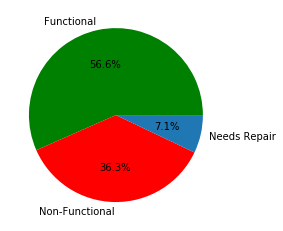

In [200]:
func_pop = functional.population.sum()
nonfunc_pop = non_functional.population.sum()
repair_pop = needs_repair.population.sum()

populations = [func_pop, nonfunc_pop, repair_pop]
pop_labels = ['Functional', 'Non-Functional', 'Needs Repair']

clrs = ['g', 'r', 'C0']

plt.pie(populations, labels=pop_labels, colors=clrs, autopct='%1.1f%%')

plt.savefig('populations.png')

In [201]:
populations

[6050282, 3880455, 755916]

In [208]:
len(df[df.status_group=='functional'])

32259

In [233]:
waterpoints = list(df.waterpoint_type.unique())
failure_rate = {}

for w in waterpoints:
    temp_df = df[df.waterpoint_type == w]
    total = len(temp_df.status_group)
    failure = len(temp_df[temp_df.status_group=='non functional'])
    failure_rate[w] = failure/total

In [274]:
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [288]:
quantities = list(df.quantity.unique())
quant_fail = {}

for q in quantities:
    temp_df = df[df.quantity == q]
    total = len(temp_df.status_group)
    failure = len(temp_df[temp_df.status_group=='non functional'])
    quant_fail[q] = failure/total
    

In [289]:
quant_fail = dict(sorted(quant_fail.items(), key=lambda x: x[1], reverse=True))

In [290]:
quant_fail

{'dry': 0.9689401216778738,
 'unknown': 0.7122940430925222,
 'insufficient': 0.38092405314297045,
 'seasonal': 0.3232098765432099,
 'enough': 0.27535707828602424}

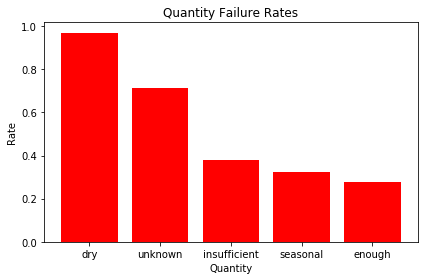

In [294]:
plt.bar(quant_fail.keys(), quant_fail.values(), color='r')
plt.title("Quantity Failure Rates")
plt.xlabel('Quantity')
plt.ylabel('Rate')
plt.tight_layout()
plt.savefig('quantity.png')

In [234]:
failure_rate

{'communal standpipe': 0.2992777505083795,
 'communal standpipe multiple': 0.5276093724397837,
 'hand pump': 0.32330741079597436,
 'other': 0.8224137931034483,
 'improved spring': 0.17346938775510204,
 'cattle trough': 0.25862068965517243,
 'dam': 0.14285714285714285}

In [235]:
failure_rate = dict(sorted(failure_rate.items(), key=lambda x: x[1], reverse=True))

In [236]:
failure_rate

{'other': 0.8224137931034483,
 'communal standpipe multiple': 0.5276093724397837,
 'hand pump': 0.32330741079597436,
 'communal standpipe': 0.2992777505083795,
 'cattle trough': 0.25862068965517243,
 'improved spring': 0.17346938775510204,
 'dam': 0.14285714285714285}

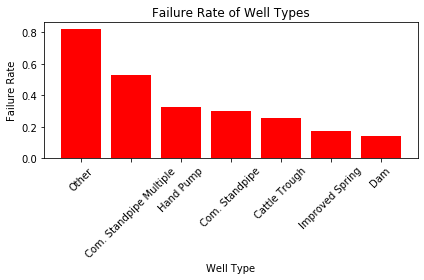

In [252]:
failure_labels = 'Other', 'Com. Standpipe Multiple', 'Hand Pump', 'Com. Standpipe', 'Cattle Trough', 'Improved Spring', 'Dam'
plt.bar(failure_labels, failure_rate.values(), color='r')
plt.xticks(rotation=45)
plt.xlabel('Well Type')
plt.ylabel('Failure Rate')
plt.title('Failure Rate of Well Types')
plt.tight_layout()
plt.savefig('failurerate.png')

In [ ]:
plt.bar(functional.status_group, functional.gps_height, width=.4, color='g')

(array([1.0633e+04, 2.7150e+03, 8.9800e+02, 1.3850e+03, 2.2770e+03,
        2.7490e+03, 1.6170e+03, 4.2300e+02, 1.2500e+02, 2.0000e+00]),
 array([ -59. ,  209.6,  478.2,  746.8, 1015.4, 1284. , 1552.6, 1821.2,
        2089.8, 2358.4, 2627. ]),
 <a list of 10 Patch objects>)

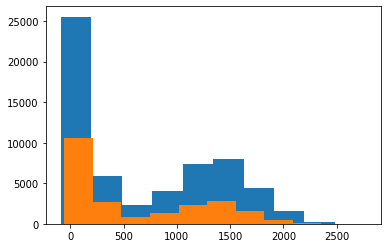

In [231]:
plt.hist(final_df.gps_height)
plt.hist(non_functional.gps_height)

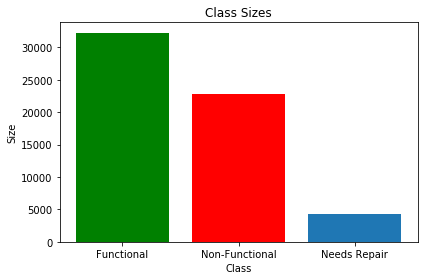

In [272]:
class_sizes = [len(functional.status_group), len(non_functional.status_group), len(needs_repair.status_group)]
classes = 'Functional', 'Non-Functional', 'Needs Repair'
plt.title('Class Sizes')
plt.xlabel('Class')
plt.ylabel('Size')
plt.bar(classes, class_sizes, color=['g','r','C0'])
plt.tight_layout()
plt.savefig('classsize.png')

In [232]:
final_df.head()

,amount_tsh,gps_height,population,public_meeting,basin,region,scheme_management,permit,extraction_type,management_group,payment,water_quality,quality_group,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,109,1,Lake Nyasa,Iringa,VWC,0,gravity,user-group,pay annually,soft,good,enough,spring,communal standpipe,functional
1,0.0,1399,280,0,Lake Victoria,Mara,Other,1,gravity,user-group,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,250,1,Pangani,Manyara,VWC,1,gravity,user-group,pay per bucket,soft,good,enough,dam,communal standpipe,functional
3,0.0,263,58,1,Ruvuma / Southern Coast,Mtwara,VWC,1,submersible,user-group,never pay,soft,good,dry,borehole,communal standpipe,non functional
4,0.0,0,0,1,Lake Victoria,Kagera,Other,1,gravity,other,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,functional


In [235]:
final_df[final_df.quantity=='dry'].shape

(6246, 17)

In [236]:
total = 6246

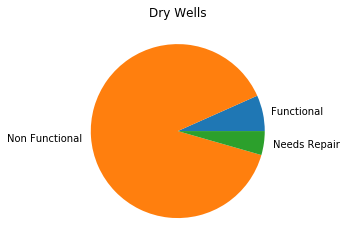

In [250]:
sizes = [60, 800, 40]
labels = 'Functional', 'Non Functional', 'Needs Repair'
plt.title('Dry Wells')
plt.pie(sizes, labels=labels)
plt.savefig('dry.png')

In [241]:
final_df.describe()

,amount_tsh,gps_height,population,public_meeting,permit
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,179.909983,0.858771,0.654074
std,2997.574558,693.116350,471.482176,0.348261,0.475673
min,0.000000,-90.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,369.000000,25.000000,1.000000,1.000000
75%,20.000000,1319.250000,215.000000,1.000000,1.000000
max,350000.000000,2770.000000,30500.000000,1.000000,1.000000


In [ ]:
functional = 

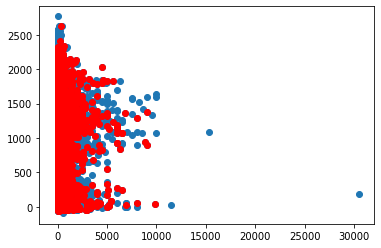

In [251]:
plt.scatter(final_df.population, final_df.gps_height)
plt.scatter(non_functional.population, non_functional.gps_height, color='r')
plt.xlabel('Altitude')
plt.ylabel('Population')
plt.title('Population vs Altitude')

In [ ]:
np.mean(nonfunctional.df)

In [330]:
def get_installers(df):
    installers = dict(df.installer.value_counts()[:15])
    names = sorted(installers.keys())
    total = sum(installers.values())
    for name in names:
        installers[name] = installers[name]/total
    return dict(sorted(installers.items(), key=lambda x:x[1],reverse=True))

In [331]:
installers = get_installers(df)

In [332]:
installers

{'DWE': 0.5961222252671965,
 'Government': 0.06251712798026857,
 'RWE': 0.04131268840778295,
 'Commu': 0.03631131816936147,
 'DANIDA': 0.035968758563990136,
 'KKKT': 0.03076185256234585,
 'Hesawa': 0.02877500685119211,
 '0': 0.0266168813373527,
 'TCRS': 0.024218964099753357,
 'Central government': 0.02130720745409701,
 'CES': 0.02089613592765141,
 'Community': 0.018943546177034806,
 'DANID': 0.01890929021649767,
 'District Council': 0.018875034255960536,
 'HESAWA': 0.018463962729514935}

In [336]:
values = {'DWE': 0.5961222252671965,
 'Government': 0.06251712798026857,
 'RWE': 0.04131268840778295,
 'Commu': 0.03631131816936147,
 'DANIDA': 0.035968758563990136}

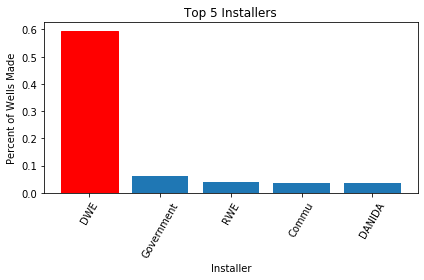

In [351]:
bar = plt.bar(values.keys(), values.values())
plt.xticks(rotation=60)
plt.xlabel('Installer')
plt.ylabel('Percent of Wells Made')
plt.title('Top 5 Installers')
bar[0].set_color('r')
plt.tight_layout()
plt.savefig('func_installer.png')

In [347]:
temp = df[df.installer=='DWE']
total = len(temp.installer)
fails = len(temp[temp.status_group=='non functional'])

In [348]:
print(fails/total)

0.3647281921618205
